In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#importing the data
yeast = pd.read_csv('yeast.csv')
X = yeast.iloc[:,0:8]
results = yeast.iloc[:,8]
x_train,x_test,results_train,results_test=train_test_split(X,results,test_size=0.33)


#sigmoid function
def sig(X, beta):
  return 1/(1+np.exp(- (X @ beta)))

#cost function
def cost(X, y, beta):
  M,N = X.shape
  y = np.array(y)
  return -1/M*( y.T@np.log(sig(X,beta)) +(np.ones(len(y))  -y).T@np.log( np.ones(len(y))  -sig(X,beta) ) )
#gradient descent function
def GradientDescent(X, Y, alpha, print_cost = False):
  M, N = X.shape
  X2 = X.copy()
  allOnes = np.ones((len(Y), 1))               
  X2 = np.hstack([allOnes, X2]) # Concatenating the allOnes column to X2(for the intercept value).
  #np.random.seed(0)
  beta = np.random.uniform(-10.0, 10.0, N + 1)
  cost_array = []
  i = 1

  while(True):
    cost_ = cost(X2, Y, beta)
    
    cost_array.append(cost_)
    if print_cost:
      print("Iteration :", i, '\t', "Cost : " + '%.7f'%cost_)
    i+=1
    gradientVector =(2/M) * (X2.T @ (sig(X2,beta) - Y))
    if(np.linalg.norm(alpha *  gradientVector)<0.001):
      break
    beta -= alpha *  gradientVector

  return beta

classes = []



for x in results :
  if(not(x in classes)):
    classes.append(x)
betas = []
for i in classes:
  y = []
  for j in results_train :
    if (i==j):
      y.append(1)
    else:
      y.append(0)
  betas.append(GradientDescent(x_train,y,1))



#prediction function
def predict(X,betas):
  res = []
  
  for ex in X:
    i = 0
    p = -1
    idx = -1

    for beta in betas :
      if sig(ex,beta) > p:
        p = sig(ex,beta)
        idx = i
      i+=1
    # print(p,idx)
    res.append(classes[idx])
  return res
allOnes = np.ones((len(results_test), 1))               
x_test = np.hstack([allOnes, x_test])
res = predict(x_test,betas)

c = 0
for i in range(len(res)):
  if(res[i]==results_test.iloc[i]): 
    c+=1
print("accuracy is " , c/len(res))
#M, N = X.shape
# beta = np.random.uniform(-10.0, 10.0,N )
# sig(X.iloc[0],beta)
#predict(np.hstack([np.ones((N, 1)), X]),betas)


accuracy is  0.5612244897959183


In [11]:
betas

[array([-5.08164917, -1.03591597,  2.73457409,  2.50787961,  8.67613771,
        -3.88299816,  0.38277324,  3.94373312, -5.33611521]),
 array([-3.52924114, -2.14265446, -1.87419296,  6.56374299, -2.32181089,
         1.46281014, -2.73798916, -1.51099944,  6.54301503]),
 array([-2.04279872, -0.22224357, -1.64868083,  7.74020875, -3.93896837,
        -1.1547543 , -2.18671213,  1.58028165, -3.58093525]),
 array([-11.92641884,  10.18880391,  10.71082333,  -9.02985766,
         -1.9251259 ,  -6.01170847,   0.33510779,   4.24305955,
          0.97952542]),
 array([ -1.52583801,   6.94517076,   9.92970461,   4.44399089,
         -2.60000801, -12.67356486,  -9.25327434, -11.79792687,
         -7.52688647]),
 array([-2.83742479, 10.19137077, -2.06401375, -9.39091685,  0.24074245,
        -2.71932759, -7.63066673,  3.40687797, -6.0277693 ]),
 array([ 13.38008664,  -7.92143025,  -0.78433609, -30.64696395,
         -3.36439496,   1.88198373,  -1.99533428,   4.46311568,
         -0.43464609]),
 arr

In [26]:
import pandas as pd
from sklearn.linear_model import SGDClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

yeast = pd.read_csv('yeast.csv')
X = yeast.iloc[:,0:8]
y = yeast.iloc[:,8]
allOnes = np.ones((len(y), 1))               
X = np.hstack([allOnes, X])
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.33)
lr = SGDClassifier()
sgd_clf =lr.fit(x_train, y_train)
calibrator = CalibratedClassifierCV(sgd_clf, cv='prefit')
model=calibrator.fit(x_train, y_train)

y_train_pred = model.predict_proba(x_train)
y_test_pred = model.predict_proba(x_test)
sgd_clf.fit(x_train, y_train)
print("accuracy is: " , sgd_clf.score(x_test, y_test))


accuracy is:  0.5183673469387755


In [14]:
sgd_clf.coef_


array([[ 9.35783289e-15,  5.66952175e-01, -2.11845033e+00,
         8.58353400e+00, -4.09668668e+00, -1.37165849e+00,
        -2.37144512e+00,  2.79513518e+00, -4.90748926e+00],
       [-1.25715004e+00,  2.40744233e+00,  2.81601609e+00,
         2.82858759e-01,  7.35432774e-01,  5.02860016e+00,
         0.00000000e+00,  3.14287510e-01, -1.27600729e+00],
       [ 1.79617056e+00,  2.67988648e+00,  4.73111327e+00,
         3.46301685e+00, -1.52315264e+00, -1.25731940e+00,
        -5.96328627e-01, -5.21967166e+00, -2.77328735e+00],
       [ 9.73425484e-01,  7.11898504e+00,  9.05934651e+00,
        -7.40776794e+00,  1.23300561e-01, -1.29790065e+00,
        -8.07943152e-01,  3.91965995e+00,  3.05655602e+00],
       [ 2.68231350e+00,  6.86001676e+00, -3.63788768e+00,
        -4.96563286e+00, -1.03939648e-01,  2.01173512e+00,
        -1.39145013e+00,  1.09304275e+00, -2.77284158e+00],
       [-3.24475161e-01, -6.18774133e+00, -8.14432655e-01,
        -2.36574840e+01, -1.91115870e+00, -1.946850

In [15]:
sgd_clf.classes_

array(['CYT', 'ERL', 'EXC', 'ME1', 'ME2', 'ME3', 'MIT', 'NUC', 'POX',
       'VAC'], dtype='<U3')

In [16]:
sgd_clf.classes_[5]

'ME3'

In [17]:
sgd_clf.predict(x_test)

array(['ME2', 'NUC', 'ME3', 'ME1', 'NUC', 'ME2', 'POX', 'ME1', 'VAC',
       'NUC', 'MIT', 'ME3', 'NUC', 'MIT', 'ME1', 'NUC', 'NUC', 'NUC',
       'ME3', 'MIT', 'POX', 'POX', 'NUC', 'NUC', 'ME3', 'MIT', 'ME3',
       'MIT', 'NUC', 'NUC', 'VAC', 'NUC', 'NUC', 'NUC', 'POX', 'NUC',
       'NUC', 'NUC', 'VAC', 'MIT', 'ME1', 'VAC', 'ME3', 'MIT', 'POX',
       'POX', 'MIT', 'NUC', 'MIT', 'POX', 'ME2', 'NUC', 'ME2', 'CYT',
       'NUC', 'NUC', 'ME3', 'MIT', 'MIT', 'MIT', 'ME2', 'MIT', 'ME1',
       'NUC', 'POX', 'NUC', 'MIT', 'VAC', 'ME2', 'ME3', 'NUC', 'NUC',
       'MIT', 'MIT', 'ME1', 'MIT', 'MIT', 'MIT', 'NUC', 'NUC', 'ME3',
       'NUC', 'NUC', 'VAC', 'NUC', 'NUC', 'ME1', 'NUC', 'NUC', 'NUC',
       'NUC', 'ME3', 'MIT', 'ME2', 'MIT', 'NUC', 'NUC', 'NUC', 'POX',
       'NUC', 'NUC', 'NUC', 'NUC', 'POX', 'ME3', 'MIT', 'NUC', 'NUC',
       'NUC', 'ME2', 'MIT', 'MIT', 'NUC', 'MIT', 'POX', 'ME3', 'NUC',
       'NUC', 'POX', 'NUC', 'MIT', 'NUC', 'MIT', 'NUC', 'MIT', 'MIT',
       'NUC', 'NUC',

In [21]:
#coefficient difference
sgd_clf.coef_-betas

array([[  5.08164917,   1.60286815,  -4.85302443,   6.0756544 ,
        -12.77282439,   2.51133968,  -2.75421835,  -1.14859794,
          0.42862595],
       [  2.2720911 ,   4.55009679,   4.69020905,  -6.28088423,
          3.05724366,   3.56579002,   2.73798916,   1.82528695,
         -7.81902232],
       [  3.83896929,   2.90213006,   6.37979409,  -4.2771919 ,
          2.41581573,  -0.10256509,   1.5903835 ,  -6.79995331,
          0.8076479 ],
       [ 12.89984432,  -3.06981887,  -1.65147682,   1.62208972,
          2.04842646,   4.71380782,  -1.14305094,  -0.3233996 ,
          2.07703061],
       [  4.20815151,  -0.08515399, -13.56759228,  -9.40962375,
          2.49606836,  14.68529998,   7.86182421,  12.89096962,
          4.7540449 ],
       [  2.51294963, -16.3791121 ,   1.24958109, -14.26656717,
         -2.15190116,   0.77247662,   6.55340919,  -3.5853393 ,
          4.3177852 ],
       [-11.53245469,   6.32014923,   3.49624921,  33.55595781,
         10.54963032,  -5.3719

In [34]:
#confusion matrix
l = len(classes)
confmatrix = np.zeros((l,l))
nums = []
# for x in sgd_clf.classes_ :
#   a = 0
#   for y in restest:
#     if(x==y):
#       a+=1
#   nums.append(a)
restest = results_test.to_numpy()
for i in range(len(res)):
  #print(i,restest[i],res[i])
  confmatrix [classes.index(restest[i])] [classes.index(res[i])]+=1
# for i in range (l):
#   for j in range(l):
#     if(nums[i]!=0):
#       confmatrix [classes.index(restest[i])] [classes.index(res[i])]/=nums[i]
df = pd.DataFrame(confmatrix,
                 index=classes,
                 columns=classes)
df

,MIT,NUC,CYT,ME1,EXC,ME2,ME3,VAC,POX,ERL
MIT,41.0,1.0,35.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
NUC,6.0,67.0,63.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
CYT,10.0,30.0,105.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ME1,5.0,0.0,0.0,6.0,3.0,2.0,2.0,0.0,0.0,0.0
EXC,2.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
ME2,3.0,2.0,4.0,0.0,1.0,4.0,2.0,0.0,0.0,0.0
ME3,0.0,5.0,6.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0
VAC,2.0,1.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
POX,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
ERL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


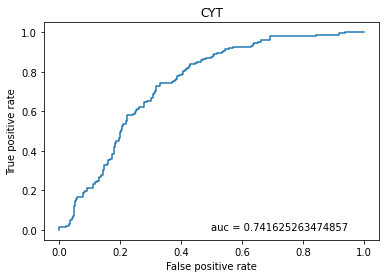

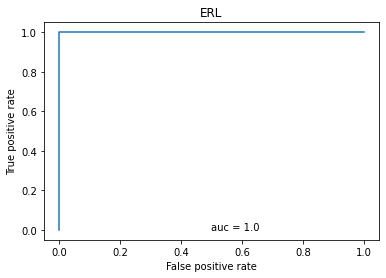

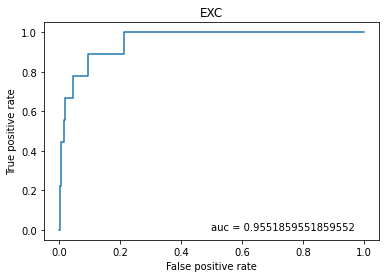

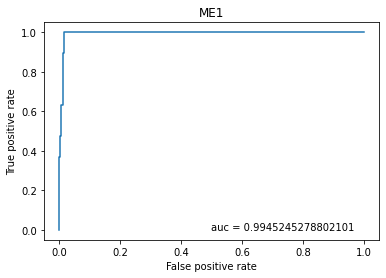

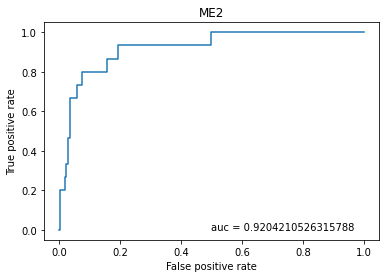

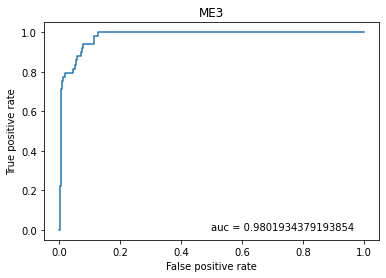

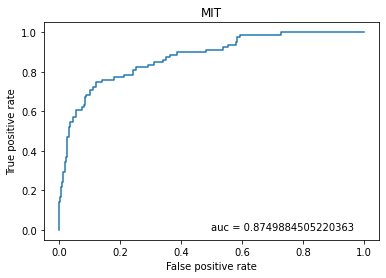

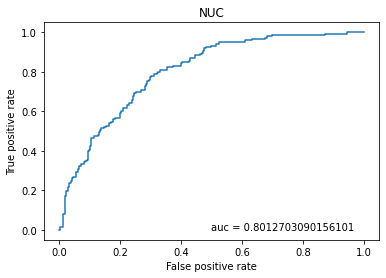

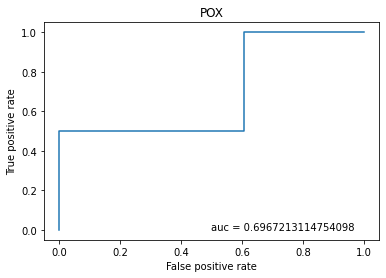

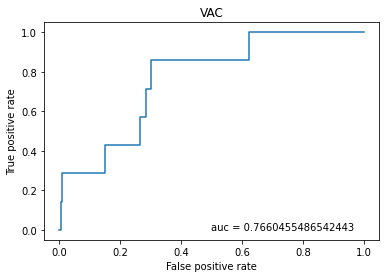

<Figure size 432x288 with 0 Axes>

In [37]:
from sklearn.metrics import roc_curve, auc ,roc_auc_score
import matplotlib.pyplot as plt

for i in range (len(classes)):
    proba = model.predict_proba(x_test).T[i]
    np.shape(proba)
    fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=sgd_clf.classes_[i])
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(sgd_clf.classes_[i])
    auc = 0
    y_true = [1 if item == sgd_clf.classes_[i] else 0 for item in y_test ]
    auc = roc_auc_score(y_true,proba)
    # except:
    #     auc = 0
    plt.annotate("auc = {}".format(auc),xy=(0.5,0))
    plt.figure()
